## 텐서플로우 변경 부분 설명

https://www.tensorflow.org/guide/effective_tf2?hl=ko

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
import numpy as np

In [4]:
import pandas as pd

print(pd.__version__)

0.25.1


In [5]:
%ls

README.md
board/
gpu와 cpu  test.ipynb
graduate-admissions/
log/
logs/
tensonflow 100_tensorflow 상수 알아보기.ipynb
tensonflow 700_tensorboard 알아보기.ipynb
tensonflow_기초.ipynb
tensorboard_1.png
tensorcpu_텐서플로우 버전확인.ipynb
tensorflow 100_fill로 모든 원소를 동일한 값을 배정해서 텐서 생성하기.ipynb
tensorflow 100_linspace range 함수를 이용해서 텐서 1차 생성하기.ipynb
tensorflow 100_random 함수 알아보기.ipynb
tensorflow 100_zeros_like ones_like로 고정 길이 텐서 생성하기.ipynb
tensorflow 700_tensorboard를 위한 로그에 대한 inspect 검사하기.ipynb
tensorflow gpu 확인하기 .ipynb
tensorflow2_예제.ipynb
tesorflow 2_선형회귀.ipynb
tf_function.ipynb
상수 정의.ipynb
코랩.ipynb
텐서플로우 gpu.ipynb
딥러닝입문_.ipynb
텐서플로우_2_mnist.ipynb
텐서플로우_2버전_수학 기본 연산 및 함수 알아보기.ipynb
텐서플로우_2버전_고유값 분해.ipynb
텐서플로우_2버전_선형대수 함수.ipynb


In [6]:
data = pd.read_csv('./graduate-admissions/Admission_Predict_Ver1.1.csv' )

In [7]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 
categorical_research_features = data[ [ 'Research' ] ].values 

X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )
Y = data[ [ 'Chance of Admit ' ] ].values

In [9]:
X.shape

(500, 7)

In [14]:
train_features = X[:400]

In [15]:
test_features = X[400 : ]

In [16]:
train_labels = Y[:400]

In [17]:
test_labels = Y[400:]

In [10]:
import sklearn

In [12]:
from sklearn.model_selection import train_test_split
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

## 
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

In [13]:
X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 ) 
                                                          
test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 ) 

## 함수 정의 

Mean Squared Error function

The derivative of Mean Squared Error function

Hypothesis function/ Regression function

In [14]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [15]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [16]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 1.5286320447921753
Loss is 1.110734224319458
Loss is 0.9197078943252563
Loss is 0.8337678909301758
Loss is 0.7956662178039551
Loss is 0.7806136012077332
Loss is 0.7762805819511414
Loss is 0.7749195098876953
Loss is 0.774990439414978
Loss is 0.7749422788619995


In [17]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )

Mean Absolute Error = 0.9148734211921692


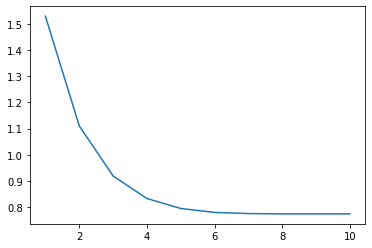

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot( epochs_plot , loss_plot ) 
plt.show()